   Taxi_dist  Market_dist  Hospital_dist  Carpet_area  Builtup_area  \
0     9796.0       5250.0        10703.0       1659.0        1961.0   
1     8294.0       8186.0        12694.0       1461.0        1752.0   
2    11001.0      14399.0        16991.0       1340.0        1609.0   
3     8301.0      11188.0        12289.0       1451.0        1748.0   

   Parking_type City_type  Rainfall  Price_house  
0          Open     CAT B       530      6649000  
1  Not Provided     CAT B       210      3982000  
2  Not Provided     CAT A       720      5401000  
3       Covered     CAT B       620      5373000  


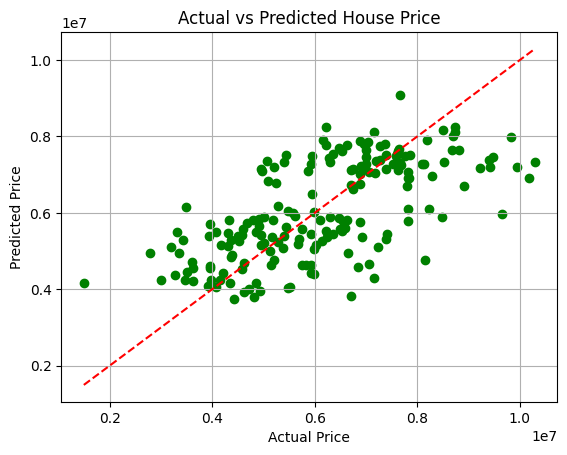

MAE: 1022900.1860934836
MSE: 1655449701800.623
RMSE: 1286642.8027236708
R²: 0.4098726248175728


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Read CSV
df = pd.read_csv("/content/Data.csv")

# Show first 4 rows
print(df.head(4))

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Parking_type', 'City_type'], drop_first=True)

# Fill missing values with the mean
df.fillna(df.mean(), inplace=True)

# Features and Target
X = df.drop('Price_house', axis=1)
y = df['Price_house']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Plot
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Price')
plt.grid(True)
plt.show()

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)